# **Change Current Working Directory**

In [1]:
from pathlib import Path
import os

project_root = Path('..').resolve()
os.chdir(project_root)

print('Current working directory:', os.getcwd())

Current working directory: C:\Users\ibnum\Desktop\Material Learning\Portfolio Bagas\ML\Insurance Charges


# **Import Modules**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.config import config
from src.data import clean_data, load_data
from src.model import save_load

# **Load Data**

In [3]:
df = load_data.read_data(file_path=config.RAW_DATA)
df.head()

Data loaded succesfully from data/raw/insurance.csv!
Data shape: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **Exploratory Data Analysis**

In [4]:
df = clean_data.remove_duplicates(data=df)

Data shape before dropping duplicates: (1338, 7)
Total duplicates in dataset: 1

Removing duplicates....
Duplicates have dropped. Data shape after dropping duplicates: (1337, 7)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


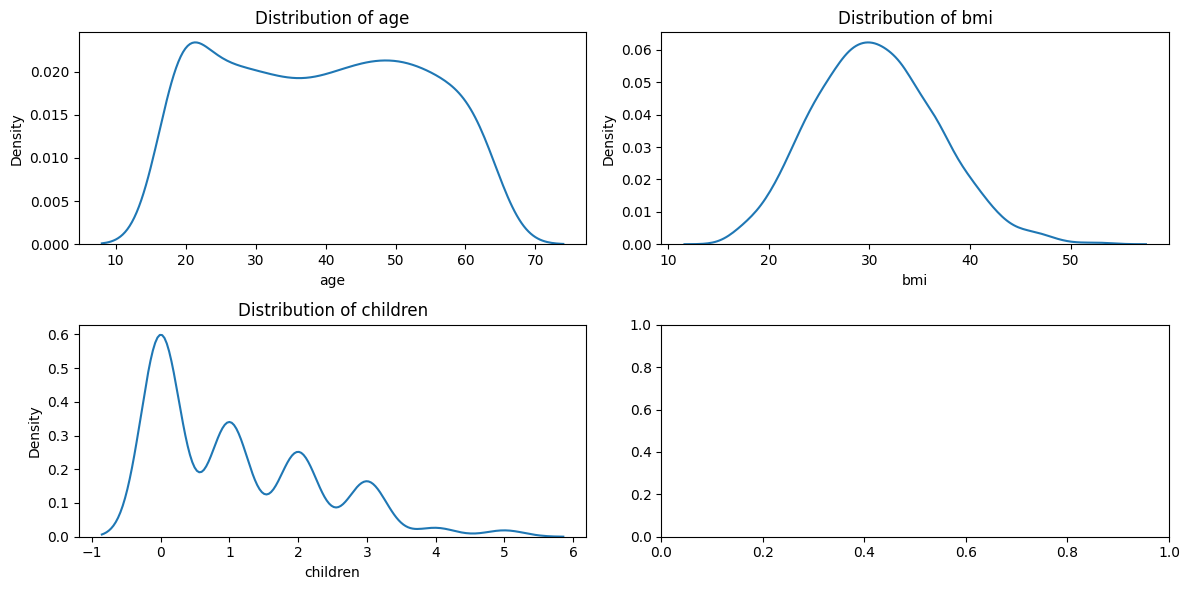

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
axes = ax.flatten()

for i, col in enumerate(config.NUM_COLS):
    sns.kdeplot(df[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [7]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


Based on visualization and table above, there is no outlier in the entire numeric columns, I will jump into next step to check categorical column distribution

In [8]:
for col in config.CAT_COLS:
    print(f'{df[col].value_counts(normalize=True)}\n')

sex
male      0.504862
female    0.495138
Name: proportion, dtype: float64

smoker
no     0.795064
yes    0.204936
Name: proportion, dtype: float64

region
southeast    0.272251
southwest    0.243082
northwest    0.242334
northeast    0.242334
Name: proportion, dtype: float64



Each category on each column has already decently distributed, meaning there is no a such messy thing that I have to clean anymore. So, we can jump into the next exploration step

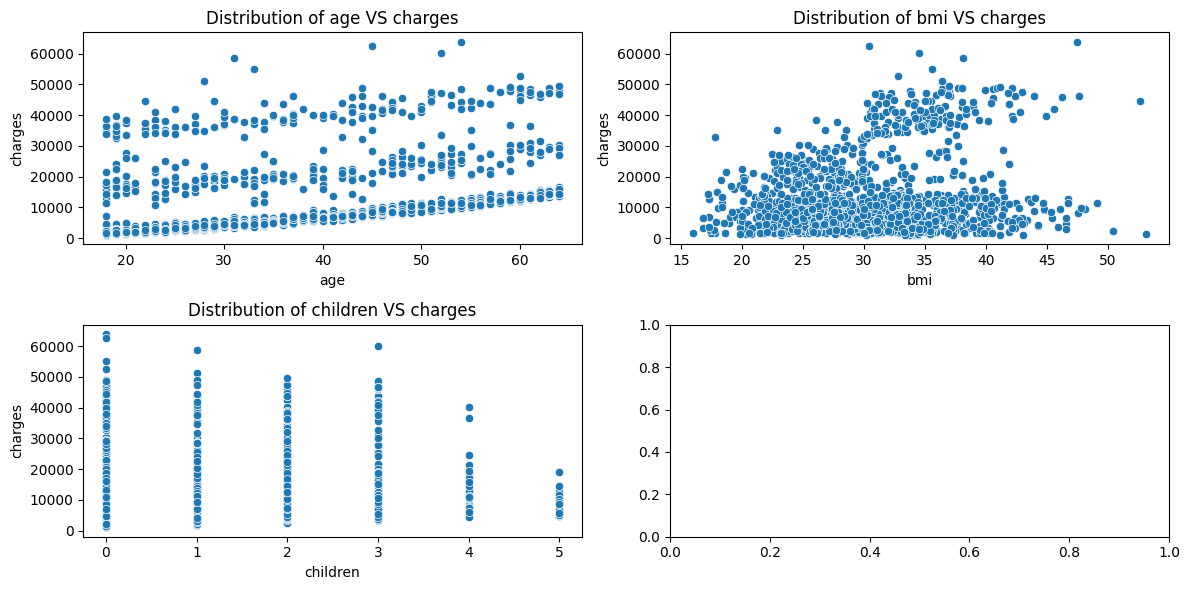

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
axes = ax.flatten()

for i, col in enumerate(config.NUM_COLS):
    sns.scatterplot(
        data=df,
        x=col,
        y=config.TARGET,
        ax=axes[i]
    )
    
    axes[i].set_title(f'Distribution of {col} VS {config.TARGET}')

plt.tight_layout()
plt.show()

Based on the visualization above, each numerical column has no linear distribution correspond to the charges column as the prediction target. If I see this kind of pattern, I think Linear Regression model is not enough to give better performance. Having said that, I will also use other bagging and boosting models to improve the model complexity towards this distribution.

In [11]:
# save cleaned dataframe to cleaned path
df.to_csv(config.CLEAN_DATA)